In [1]:
import enum
import random
import json
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import copy
import math

from matplotlib.patches import Rectangle
from shapely.geometry import box

In [2]:
target_data = []
sensord_s1 = []
sensord_s2 = []
sensord_s3 = []
sensord_comb = []
sensord_TO = []
cost_trend = []

# Placement optimization for each type
target_dict = {}
placementT_s1 = {}
placementT_s2 = {}
placementT_s3 = {}
placementT_comb = {}
placement_TO_type = {}

target_dict_type = {}
place_dsens_1 = {}
place_dsens_2 = {}
place_dsens_3 = {}
place_dtype_comb = {}
place_dTO_type = {}


In [3]:
class Type_sens(enum.Enum):
    sens_1 = 1  # Cost of type S1 is 300
    sens_2 = 2  # Cost of type S2 is 170
    sens_3 = 3  # Cost of type S3 is 65

class Cost_sens(enum.Enum):
    sens_1 = 300
    sens_2 = 170
    sens_3 = 65
    
class Range_sens(enum.Enum):
    sens_1 = 100 
    sens_2 = 70
    sens_3 = 30

In [4]:
class Target:
    def __init__(self, width, height, targetId):
        self.pos_x = random.randint(0, width)
        self.pos_y = random.randint(0, height)
        self.target_id = targetId
        self.coverage = 0
        self.coverage_list = []
        pass

In [5]:
class Sensor:

    def __init__(self, width, height, sensorType, Range_sens, Cost_sens, sensorId):
        self.sensor_type = sensorType
        self.sensor_id = sensorId
        self.sensor_cost = Cost_sens
        self.pos_x = random.randint(0, 500)
        self.pos_y = random.randint(0, 500)
        self.range = Range_sens
        self.coverage = 0
        self.coverage_list = []
        self.sensor_present = True
        self.sensor_area = round((math.pi * ((Range_sens)**2)), 2)
        self.used_status = True
        pass

In [6]:
class Layout:

    def __init__(self, width, height, sensorCount, targetCount, kCoverage):
        self.width = width
        self.height = height
        self.k = kCoverage
        self.sensor_count = sensorCount
        self.target_count = targetCount
        pass

    def sensor_gen(self, sensorType, combination, calculate_placement, targetvalue):
        if ((calculate_placement == False) & (combination == False)):
            if sensorType == Type_sens.sens_1.value:
                for s1 in range(0, 8):
                    sensor_s1 = Sensor(self.width, self.height,
                                       sensorType, Range_sens.sens_1.value, Cost_sens.sens_1.value, s1)
                    sensor_s1_pos = [sensor_s1.pos_x, sensor_s1.pos_y]
                    placementT_s1[s1] = tuple(sensor_s1_pos)
                    place_dsens_1[s1] = sensor_s1
                    sensord_s1.append(sensor_s1)
            if sensorType == Type_sens.sens_2.value:
                for s2 in range(0, 17):
                    sensor_s2 = Sensor(self.width, self.height,
                                       sensorType, Range_sens.sens_2.value, Cost_sens.sens_2.value, s2)
                    sensor_s2_pos = [sensor_s2.pos_x, sensor_s2.pos_y]
                    placementT_s2[s2] = tuple(sensor_s2_pos)
                    place_dsens_2[s2] = sensor_s2
                    sensord_s2.append(sensor_s2)
            if sensorType == Type_sens.sens_3.value:
                for s3 in range(0, 200):
                    sensor_s3 = Sensor(self.width, self.height,
                                       sensorType, Range_sens.sens_3.value, Cost_sens.sens_3.value, s3)
                    sensor_s3_pos = [sensor_s3.pos_x, sensor_s3.pos_y]
                    placementT_s3[s3] = tuple(sensor_s3_pos)
                    place_dsens_3[s3] = sensor_s3
                    sensord_s3.append(sensor_s3)
        elif combination == True:
            count_test = 0
            for s1 in range(0, 7):
                count_test = count_test+1
                sensor_s1 = Sensor(self.width, self.height,
                                   Type_sens.sens_1.value, Range_sens.sens_1.value, Cost_sens.sens_1.value, count_test)
                sensor_s1_pos = [sensor_s1.pos_x, sensor_s1.pos_y]
                placementT_comb[count_test] = tuple(sensor_s1_pos)
                place_dtype_comb[count_test] = sensor_s1
                sensord_comb.append(sensor_s1)
            for s2 in range(0, 17):
                count_test = count_test+1
                sensor_s2 = Sensor(self.width, self.height,
                                   Type_sens.sens_2.value, Range_sens.sens_2.value, Cost_sens.sens_2.value, count_test)
                sensor_s2_pos = [sensor_s2.pos_x, sensor_s2.pos_y]
                placementT_comb[count_test] = tuple(sensor_s2_pos)
                place_dtype_comb[count_test] = sensor_s2
                sensord_comb.append(sensor_s2)
            for s3 in range(0, 77):
                count_test = count_test+1
                sensor_s3 = Sensor(self.width, self.height,
                                   Type_sens.sens_3.value, Range_sens.sens_3.value, Cost_sens.sens_3.value, count_test)
                sensor_s3_pos = [sensor_s3.pos_x, sensor_s3.pos_y]
                placementT_comb[count_test] = tuple(sensor_s3_pos)
                place_dtype_comb[count_test] = sensor_s3
                sensord_comb.append(sensor_s3)
        elif calculate_placement == True:
            for key, value in targetvalue.items():
                sensor1 = Sensor(self.width, self.height,
                                 Type_sens.sens_3.value, Range_sens.sens_3.value, Cost_sens.sens_3.value, key)
                sensor1.pos_x = value.pos_x
                sensor1.pos_y = value.pos_y
                sensor1_pos = [value.pos_x, value.pos_y]
                placement_TO_type[key] = tuple(sensor1_pos)
                place_dTO_type[key] = sensor1
                sensord_TO.append(sensor1)
        pass

    def target_gen(self):
        for a in range(0, self.target_count):
            target = Target(self.width, self.height, a)
            target_pos = [target.pos_x, target.pos_y]
            target_dict[a] = tuple(target_pos)
            target_dict_type[a] = target
            target_data.append(target)

    def location_coordinates(self):
        for loc in target_data:
            print("TargetID: " + str(loc.target_id) + " Location X: " +
                  str(loc.pos_x) + " Location Y: " + str(loc.pos_y))

    def targetvalue_gen(self):
        target_display = json.dumps(target_dict)
        print(target_display)

    def print_sensor_dictionary(self, sensor, combination, calculate_placement):
        if (combination == False) & (calculate_placement == False):
            if sensor == Type_sens.sens_1.value:
                sensor_disp = json.dumps(placementT_s1)
            if sensor == Type_sens.sens_2.value:
                sensor_disp = json.dumps(placementT_s2)
            if sensor == Type_sens.sens_3.value:
                sensor_disp = json.dumps(placementT_s2)
        elif combination == True:
            sensor_disp = json.dumps(placementT_comb)
        elif calculate_placement == True:
            sensor_disp = json.dumps(placement_TO_type)
        print(sensor_disp)

    def calc_coverage(self, sensor_dictionary, targeDict, finalCovList):
        for tD in targeDict.items():
            for sD in sensor_dictionary.items():
                if sD[1].used_status == True:
                    if sD[1].sensor_present == True:
                        status = self.calculate_distance(tD[1], sD[1])
                        if status:
                            tD[1].coverage_list.append(
                                sD[0]) if sD[0] not in tD[1].coverage_list else tD[1].coverage_list
                            sD[1].coverage_list.append(
                                tD[0]) if tD[0] not in sD[1].coverage_list else sD[1].coverage_list
                    else:
                        if (sD[0] in tD[1].coverage_list) & (tD[0] in sD[1].coverage_list):
                            tD[1].coverage_list.remove(sD[0])
                            sD[1].coverage_list.remove(tD[0])
            tD[1].coverage = len(tD[1].coverage_list)
            sD[1].coverage = len(sD[1].coverage_list)
        if (finalCovList == True):
            count = 0
            final_covered = []
            for s in sensor_dictionary.items():
                if s[1].sensor_present == True:
                    if count == 0:
                        count = count+1
                        final_covered = s[1].coverage_list
                    else:
                        final_covered = list(
                            set(s[1].coverage_list) | set(final_covered))
            return final_covered

    def sensor_opt(self, sensor_dictionary, kCoverage):
        change_list = []
        for a in sensor_dictionary.items():
            if a[1].coverage < kCoverage:
                change_list.append(a[1].sensor_id)
        return change_list

    def remove_unused(self, sensor_dictionary, targetvalue):
        checked_list = []
        for ranSensor in sensor_dictionary.keys():
            if len(sensor_dictionary[ranSensor].coverage_list) == 0:
                sensor_dictionary[ranSensor].sensor_present = False
                sensor_dictionary[ranSensor].used_status = False
                if ranSensor not in checked_list:
                    checked_list.append(ranSensor)
        remName = "RemovedSensors"
        print("Sensors not in use :" + str(len(checked_list)))
        generate_map(sensor_dictionary, targetvalue, remName, True, 'Valid Sensors')
        self.calc_coverage(sensor_dictionary, targetvalue, False)
        print("Removed Cost :" + str(self.cost_function(sensor_dictionary, targetvalue)))
        pass

    def optmize_sa(self, sensor_dictionary, targetvalue):
        init_temp = 85
        final_temp = 5
        no_of_iterations = 0
        alpha = 0.65
        current_temp = init_temp
        cost_trend = []
        atleast = 0
        while current_temp > final_temp:
            no_of_iterations += 1
            self.calc_coverage(sensor_dictionary, targetvalue, False)
            prev_cost = self.cost_function(sensor_dictionary, targetvalue)
            random_sensor = random.choice(list(sensor_dictionary.keys()))
            if sensor_dictionary[random_sensor].used_status == True:
                sensor_dictionary[random_sensor].sensor_present = False
                cov_list = self.calc_coverage(
                    sensor_dictionary, targetvalue, True)
                if (len(cov_list)/self.target_count)*100 >= 99:
                    new_cost = self.cost_function(sensor_dictionary, targetvalue)
                    cost_difference = (prev_cost - new_cost)
                    coverage_condition = True
                    for a in targetvalue.items():
                        if len(a[1].coverage_list) <= self.k:
                            pass
                        else:
                            coverage_condition = False
                    if coverage_condition:
                        if cost_difference > 0:
                            atleast += 1
                            print("No of Iter_"+str(no_of_iterations) +
                                  "----"+str(new_cost))
                            cost_trend.append(new_cost)
                        else:
                            if random.uniform(0, 1) < math.exp(-cost_difference / current_temp):
                                sensor_dictionary[random_sensor].sensor_present = True
                        current_temp -= alpha
                    else:
                        sensor_dictionary[random_sensor].sensor_present = True
                        if ((no_of_iterations > 10000) & (atleast == 0)):
                            break
                else:
                    sensor_dictionary[random_sensor].sensor_present = True
        if atleast == 0:
            print("Unable to optimize for coverage : "+str(self.k))
        else:
            saName = "After_SA"
            generate_graph(cost_trend, 'SA_Swap_Trend', 'SA Swap Trend', True)
            generate_map(sensor_dictionary, targetvalue, saName, True, 'SA Placement')
            print("Final Cost "+"----" +
                  str(self.cost_function(sensor_dictionary, targetvalue)))
        pass

    def optmize_cost_one(self, sensor_dictionary, targetvalue):
        checked_list = []
        step = 0
        for a in sensor_dictionary.items():
            step = step + 1
            target_count = len(a[1].coverage_list)
            if a[1].sensor_id not in checked_list:
                if len(a[1].coverage_list) > self.k:
                    if a[1].sensor_type == Type_sens.sens_2.value:
                        dummySensor = copy.deepcopy(a[1])
                        newSensor = Sensor(self.width, self.height,
                                           Type_sens.sens_1.value, Range_sens.sens_1.value, Cost_sens.sens_1.value, a[1].sensor_id)
                        newSensor.pos_x = a[1].pos_x
                        newSensor.pos_y = a[1].pos_y
                        self.update_sensor_type(
                            sensor_dictionary, newSensor, a[1].sensor_id)
                    elif a[1].sensor_type == Type_sens.sens_3.value:
                        dummySensor = copy.deepcopy(a[1])
                        newSensor = Sensor(self.width, self.height,
                                           Type_sens.sens_3.value, Range_sens.sens_3.value, Cost_sens.sens_3.value, a[1].sensor_id)
                        newSensor.pos_x = a[1].pos_x
                        newSensor.pos_y = a[1].pos_y
                        self.update_sensor_type(
                            sensor_dictionary, newSensor, a[1].sensor_id)
                    while target_count > 0:
                        target_count = target_count - 1
                        if targetvalue[a[1].coverage_list[target_count]].target_id != a[1].sensor_id:
                            if self.calculate_distance(targetvalue[a[1].coverage_list[target_count]], a[1]):
                                sensor_dictionary[a[1].coverage_list[target_count]
                                           ].sensor_present = False
                                checked_list.append(
                                    a[1].coverage_list[target_count])
                                nameMap = "Layout_"+str(step)+"_map"+".png"
                                generate_map(
                                    sensor_dictionary, targetvalue, nameMap, False)
                                self.calc_coverage(
                                    sensor_dictionary, targetvalue, False)
                                print("M1_"+str(step)+"-------"+str(self.cost_function(
                                    sensor_dictionary, targetvalue)))
                            else:
                                a[1] = copy.deepcopy(dummySensor)

        pass

    def optimize_cost_sa_swap(self, sensor_dictionary, targetvalue):
        initial_temp = 85
        final_temp = 0.1
        no_of_iterations = 0
        alpha = 0.3
        current_temp = initial_temp
        cost_trend = []
        atleast = 0
        while current_temp > final_temp:
            no_of_iterations += 1
            self.calc_coverage(sensor_dictionary, targetvalue, False)
            prev_cost = self.cost_function(sensor_dictionary, targetvalue)
            random_sensor_one = random.choice(list(sensor_dictionary.keys()))
            random_sensor_two = random.choice(list(sensor_dictionary.keys()))
            if sensor_dictionary[random_sensor_one].range != sensor_dictionary[random_sensor_two].range:
                self.generate_swap(
                    sensor_dictionary, targetvalue, random_sensor_one, random_sensor_two)
                cov_list = self.calc_coverage(
                    sensor_dictionary, targetvalue, True)
                if (len(cov_list)/self.target_count)*100 > 90:
                    new_cost = self.cost_function(sensor_dictionary, targetvalue)
                    cost_diff = (prev_cost - new_cost)
                    coverage_condition = True
                    for a in targetvalue.items():
                        if len(a[1].coverage_list) <= self.k:
                            pass
                        else:
                            coverage_condition = False
                    if coverage_condition:
                        if cost_diff > 0:
                            atleast += 1
                            print("No of Iter_"+str(no_of_iterations) +
                                  "----"+str(new_cost))
                            cost_trend.append(new_cost)
                        else:
                            if random.uniform(0, 1) < math.exp(-cost_diff / current_temp):
                                pass
                            else:
                                self.generate_swap(
                                    sensor_dictionary, targetvalue, random_sensor_two, random_sensor_one)
                        current_temp -= alpha
                    else:
                        self.generate_swap(
                            sensor_dictionary, targetvalue, random_sensor_two, random_sensor_one)
                        if ((no_of_iterations > 10000) & (atleast == 0)):
                            break
                        pass
                else:
                    self.generate_swap(
                        sensor_dictionary, targetvalue, random_sensor_two, random_sensor_one)
                    pass
        if atleast == 0:
            print("Unable to optimize by swap for coverage : "+str(self.k))
            saTwoName = "After_SA_Swap"
            generate_map(sensor_dictionary, targetvalue, saTwoName, True, 'SA Swap unsuccessful')
            print("Final Cost "+"----" + str(self.cost_function(sensor_dictionary, targetvalue)))
        else:
            saName = "After_SA_Swap"
            generate_map(sensor_dictionary, targetvalue, saName, True, 'SA Swap Placement')
            generate_graph(cost_trend, 'SA_Swap_Trend', 'SA Swap Trend', True)
            print("Final Cost "+"----" + str(self.cost_function(sensor_dictionary, targetvalue)))
        pass

    def cost_function(self, sensor_dictionary, targetvalue):
        coverage_cost = 0
        for tD in targetvalue.items():
            for a in tD[1].coverage_list:
                if sensor_dictionary[a].sensor_present == True:
                    coverage_cost = coverage_cost + sensor_dictionary[a].sensor_cost
        return coverage_cost

    def calculate_distance(self, target, sensor):
        isCovered = False
        dist = math.sqrt(((target.pos_x - sensor.pos_x)**2) +
                         ((target.pos_y - sensor.pos_y)**2))
        if dist <= sensor.range:
            isCovered = True
            return isCovered
        else:
            return isCovered

    def coverage_ration(self, finalList):
        return len(finalList/self.k)

    def update_sensor_type(self, sensor_dictionary, newSensor, keyVal):
        sensor_dictionary[keyVal] = copy.deepcopy(newSensor)
        pass

    def generate_swap(self, sensor_dictionary, targetvalue, keyOne, keyTwo):
        temp_x = sensor_dictionary[keyOne].pos_x
        temp_y = sensor_dictionary[keyOne].pos_y
        temp_covList = []

        sensor_dictionary[keyOne].pos_x = sensor_dictionary[keyTwo].pos_x
        sensor_dictionary[keyOne].pos_y = sensor_dictionary[keyTwo].pos_y
        sensor_dictionary[keyOne].coverage_list = []

        sensor_dictionary[keyTwo].pos_x = temp_x
        sensor_dictionary[keyTwo].pos_y = temp_y
        sensor_dictionary[keyTwo].coverage_list = temp_covList

        self.calc_coverage(
            sensor_dictionary, targetvalue, False)
        pass



In [7]:
def generate_graph(costTrend, name, titleName, showGraph):
    x = list(range(0, len(costTrend)))
    y = costTrend
    plt.plot(x, y)

    plt.xlabel('Iterations')
    plt.ylabel('Cost of the Network')
    plt.title(titleName)
    plt.savefig(name, bbox_inches='tight', dpi=150)
    if showGraph == True:
        plt.show()
    pass

In [8]:
def generate_map(sensor_dictionary, targetvalue, name, showMap, titleName):

    plt.axis([0, 500, 0, 500])
    plt.clf()
    plt.axis("equal")

    x_pos_target = []
    y_pos_target = []
    x_pos_sens = []
    y_pos_sens = []
    sens_range = []
    sens_ids = []
    target_ids = []
    bbox_list = []

    for a in targetvalue.items():
        x_pos_target.append(a[1].pos_x)
        y_pos_target.append(a[1].pos_y)
        bbox_list.append(tuple([a[1].pos_x, a[1].pos_y]))
        target_ids.append(a[1].target_id)
    x_pos_target = np.asarray(x_pos_target)
    y_pos_target = np.asarray(y_pos_target)

    c = []
    for b in sensor_dictionary.items():
        if b[1].sensor_present == True:
            x_pos_sens.append(b[1].pos_x)
            y_pos_sens.append(b[1].pos_y)
            sens_range.append(b[1].range)
            sens_ids.append(b[1].sensor_id)
            if ((b[1].sensor_type == Type_sens.sens_1.value) & (b[1].sensor_present == True)):
                c.append(plt.Circle(
                    (b[1].pos_x, b[1].pos_y), radius=b[1].range, alpha=0.35, color='blue', label="S1"))
            if ((b[1].sensor_type == Type_sens.sens_2.value) & (b[1].sensor_present == True)):
                c.append(plt.Circle(
                    (b[1].pos_x, b[1].pos_y), radius=b[1].range, alpha=0.35, color='green', label="S2"))
            if ((b[1].sensor_type == Type_sens.sens_3.value) & (b[1].sensor_present == True)):
                c.append(plt.Circle(
                    (b[1].pos_x, b[1].pos_y), radius=b[1].range, alpha=0.35, color='orange', label="S3"))
    x_pos_sens = np.asarray(x_pos_sens)
    y_pos_sens = np.asarray(y_pos_sens)
    sens_range = np.asarray(sens_range)
    sens_ids = np.asarray(sens_ids)

    for a in c:
        plt.gca().add_artist(a)

    for i, txt in enumerate(sens_ids):
        plt.annotate(
            txt, (x_pos_sens[i], y_pos_sens[i]), fontsize=10, color='red')

    plt.scatter(
        x=x_pos_target,
        y=y_pos_target,
        marker="*",
    )
    for i, txt in enumerate(target_ids):
        plt.annotate(
            txt, (x_pos_target[i]+0.25, y_pos_target[i]), fontsize=10)

    bbox = box(0, 0, 500, 500, True)
    plt.title(titleName)
    plt.savefig(name, bbox_inches='tight', dpi=150)
    if showMap == True:
        plt.show()

In [9]:
def main():
    random.seed(2)
    sensor_layout = Layout(500, 500, 600, 17, 20)

    sensor_layout.target_gen()
    print("                         The Target positions                           ")
    sensor_layout.targetvalue_gen()
    print("--------------------------------------------------------------------------")

    # For a Combination of sensors

    sensor_layout.sensor_gen(1, True, False, target_dict_type)
    print("                          Position Of Each Sensor                             ")
    sensor_layout.print_sensor_dictionary(1, True, False)
    print("-------------------------------------------------------------------------------")
    finalList = sensor_layout.calc_coverage(place_dtype_comb, target_dict_type, True)
    print("                         List of the number of targets covered                                ")
    print(finalList)
    print("------------------------------------------------------------------------------")
    generate_map(place_dtype_comb,
                 target_dict_type, 'Layout_First.png', True, 'Initial Random Placement')
    cost_of_ntwrk = sensor_layout.cost_function(place_dtype_comb, target_dict_type)
    print("                          Cost of the Network                               ")
    print(cost_of_ntwrk)
    print("----------------------------------------------------------------------------")
    print("                        Remove sensors which are not used                    ")
    sensor_layout.remove_unused(place_dtype_comb, target_dict_type)
    print("******************************************************************************")
    print("                          Simulated Annealing                                 ")
    sensor_layout.optmize_sa(place_dtype_comb, target_dict_type)

                         The Target positions                           
{"0": [489, 441], "1": [485, 434], "2": [28, 46], "3": [43, 184], "4": [427, 86], "5": [376, 414], "6": [342, 437], "7": [157, 128], "8": [310, 108], "9": [310, 18], "10": [297, 348], "11": [81, 220], "12": [326, 201], "13": [411, 370], "14": [440, 260], "15": [486, 190], "16": [278, 479]}
--------------------------------------------------------------------------
                          Position Of Each Sensor                             
{"1": [227, 257], "2": [137, 461], "3": [18, 445], "4": [14, 186], "5": [238, 477], "6": [163, 464], "7": [194, 216], "8": [456, 452], "9": [269, 84], "10": [286, 90], "11": [120, 118], "12": [12, 90], "13": [166, 88], "14": [69, 261], "15": [261, 184], "16": [263, 345], "17": [286, 93], "18": [457, 228], "19": [407, 212], "20": [376, 268], "21": [464, 465], "22": [390, 186], "23": [404, 303], "24": [181, 185], "25": [439, 492], "26": [228, 82], "27": [488, 386], "28": [204, 36

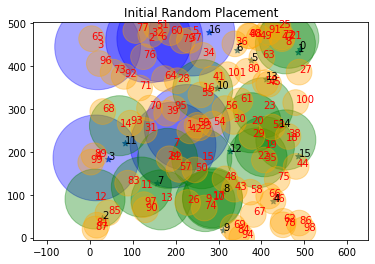

                          Cost of the Network                               
5745
----------------------------------------------------------------------------
                        Remove sensors which are not used                    
Sensors not in use :66


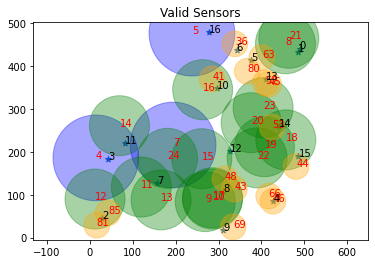

Removed Cost :5745
******************************************************************************
                          Simulated Annealing                                 
No of Iter_2----5575
No of Iter_4----5510
No of Iter_5----5445
No of Iter_16----5380
No of Iter_19----5210
No of Iter_22----5040
No of Iter_23----4975
No of Iter_25----4910
No of Iter_26----4740
No of Iter_30----4570
No of Iter_36----4465
No of Iter_44----4190
No of Iter_46----3850
No of Iter_50----3850
No of Iter_54----3785
No of Iter_61----3615
No of Iter_63----3445
No of Iter_66----3380
No of Iter_76----3550
No of Iter_101----3995
No of Iter_105----3825
No of Iter_116----3825
No of Iter_128----4165
No of Iter_137----4230
No of Iter_142----4230
No of Iter_153----4675
No of Iter_158----4505
No of Iter_160----4440
No of Iter_161----4375
No of Iter_169----4310
No of Iter_184----4140
No of Iter_193----3970
No of Iter_200----3970
No of Iter_202----3800
No of Iter_203----3630
No of Iter_207----3460
No of Iter_217---

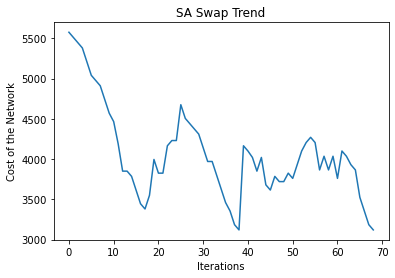

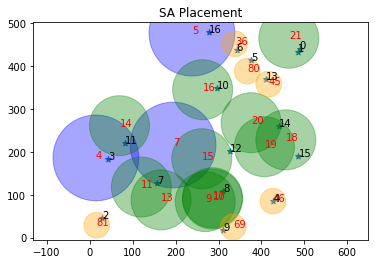

Final Cost ----3800


In [10]:

if __name__ == '__main__':
    main()
    
